## VGG

In [1]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


2023-11-01 13:52:10.254096: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 13:52:10.254144: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 13:52:10.255245: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 13:52:10.357098: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 13:52:11.617531: W tensorflow/compiler/

In [2]:
model = VGG16(weights='imagenet')

2023-11-01 13:52:21.981405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 13:52:22.263290: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 13:52:22.263618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

553467096/553467096 [==============================] - 17s 0us/step


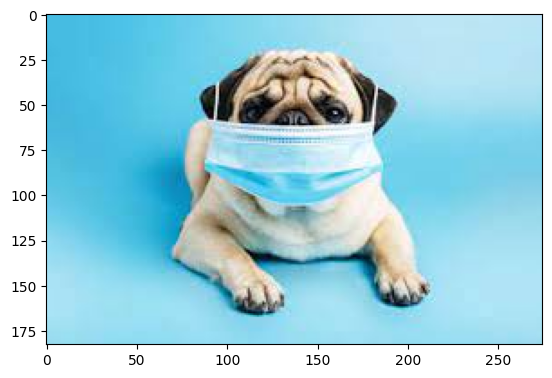

In [3]:
import matplotlib.pyplot as plt

image = cv2.imread("../data/dog.jpeg")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### 텐서플로가 제공하는 전처리 함수 적용

In [4]:
image = cv2.resize(image, dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [5]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

2023-11-01 14:16:25.148529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-11-01 14:16:27.772497: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-01 14:16:27.936238: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-01 14:16:28.080400: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

35363/35363 [==============================] - 0s 0us/step
pug (94.28%)


In [6]:
decode_predictions(yhat)

[[('n02110958', 'pug', 0.9428297),
  ('n02108915', 'French_bulldog', 0.0029187703),
  ('n02096585', 'Boston_bull', 0.0025153444),
  ('n04229816', 'ski_mask', 0.002318254),
  ('n03188531', 'diaper', 0.0023164318)]]

### 임의로 6개

In [7]:
import os

path = "../data/train/"
full_names = os.listdir(path)

labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [8]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

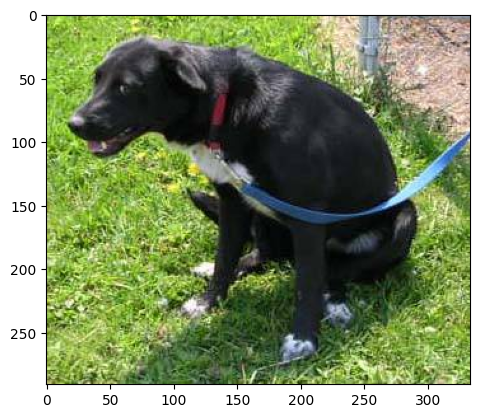

In [9]:
image = mpimg.imread(path + full_names[0])
plt.imshow(image)
plt.show()

In [10]:
def resize_and_preprocess_vgg(image):
    image = cv2.resize(image, dsize=(224,224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1],image.shape[2]))
    return preprocess_input(image)

In [11]:
def predict_vgg(model, image):
    yhat = model.predict(image)
    label = decode_predictions(yhat)
    return label[0][0][1]

1/1 [==============================] - 0s 20ms/step


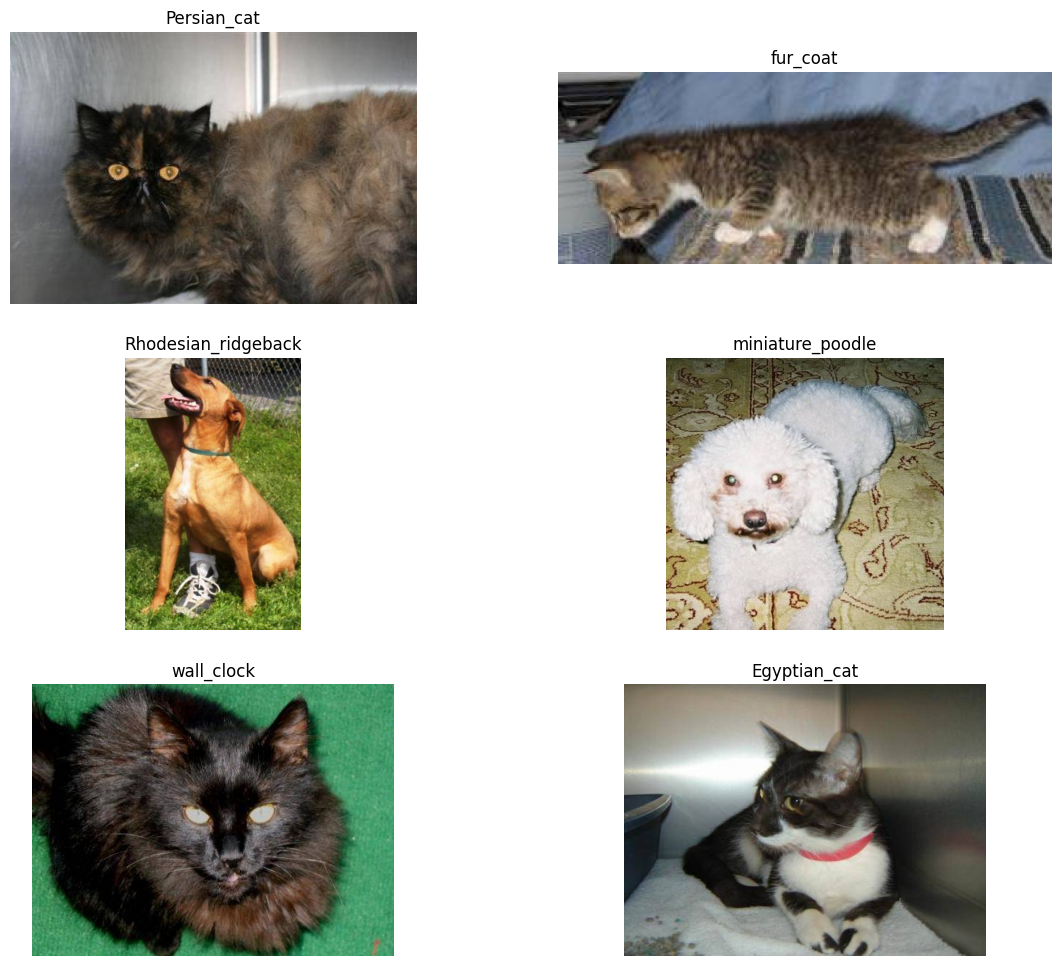

In [12]:
plt.figure(figsize=(14,12))

idx = 1
for each in random.choices(full_names, k=6):
    image = mpimg.imread(path+each)
    plt.subplot(3,2,idx)
    idx+=1
    plt.imshow(image)

    image = resize_and_preprocess_vgg(image)
    result = predict_vgg(model, image)

    plt.title(result)
    plt.axis("off")